In [1]:
from qiskit import QuantumCircuit, QuantumRegister

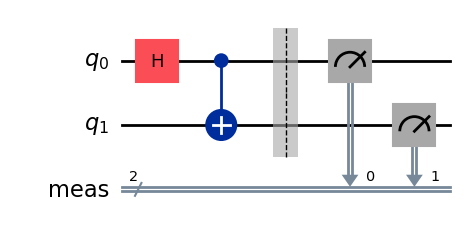

In [6]:
# quantum register is a collection of qubits
qubits = QuantumRegister(2, name='q')
qc = QuantumCircuit(qubits)

q0, q1 = qubits
qc.h(q0)
qc.cx(q0, q1)

qc.measure_all()
qc.draw("mpl")

`transpile to brisbane - 127 qubit circuit`

In [7]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

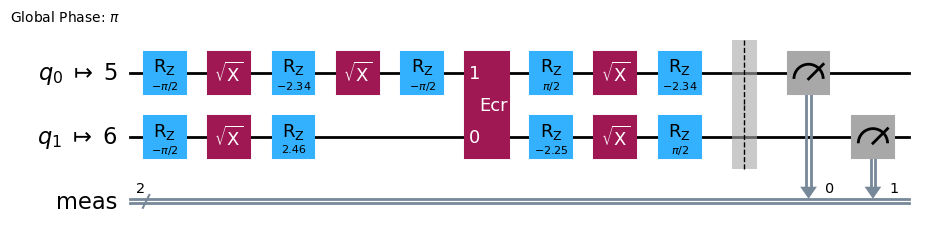

In [10]:
service = QiskitRuntimeService()
# in order to transpile we need to select a specific backend
backend = service.backend('ibm_brisbane')

# optimization level tailors it to the specific hardware - the higher the optimzation level the more time to transpile
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pass_manager.run(qc)

isa_circuit.draw("mpl", idle_wires=False)

`simulate on a mock backend`

In [20]:
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
from qiskit.visualization import plot_histogram

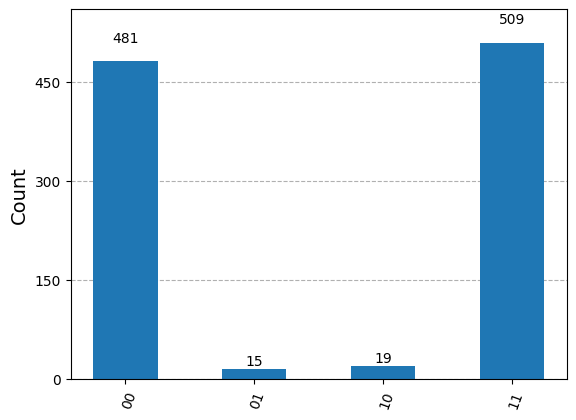

In [21]:
fake_brisbane = FakeBrisbane()
pm = generate_preset_pass_manager(backend=fake_brisbane, optimization_level=3)

isa_qc = pm.run(qc)


# Run the transpiled circuit using the simulated backend
job = fake_brisbane.run(isa_qc)
counts = job.result().get_counts()
plot_histogram(counts)

`run circuit on real hardware`

In [23]:
import numpy as np 
from qiskit.circuit.library import IQP
from qiskit.quantum_info import random_hermitian
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [24]:
n_qubits = 127
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=n_qubits)

mat = np.real(random_hermitian(n_qubits, seed=42))
circuit = IQP(mat)
circuit.measure_all()

# have to create a new pass manager since we are using real hardware and a different backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = pm.run(circuit)

sampler = Sampler(backend=backend)
job = sampler.run([isa_circuit])
result = job.result()

/var/folders/z5/vj7wxths23768hdrgtg7ck6r0000gn/T/ipykernel_2473/3694318896.py:12: DeprecationWarning: The 'backend' keyword arguments are deprecated as of qiskit-ibm-runtime 0.24.0 and will be removed no sooner than 3 months after the release date. Please use the 'mode' parameter instead.
  sampler = Sampler(backend=backend)
